## In this task, we predict the percentage of the marks that a student is expected to score based upon the number if hours they studied using liner regression

1. Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. Downloading the Data Set

In [6]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.shape

(25, 2)

plotting the dataset, to check the relationship between the data i.e., Hours and Scores


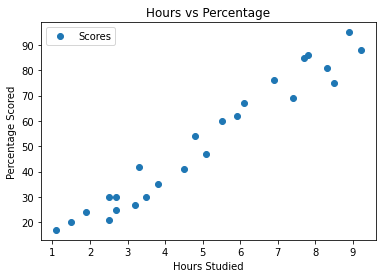

In [8]:

data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

Preparing the dataset into independent and dependent variables


In [9]:

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Splitting the data into train and test datasets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
print(model.intercept_)

2.018160041434683


In [14]:
print(model.coef_)

[9.91065648]


Plotting the regression line

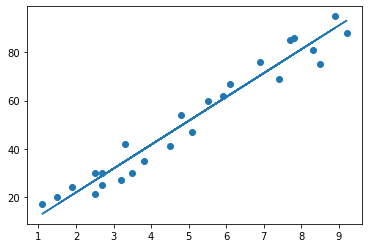

In [18]:
line = model.coef_*X+model.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [20]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Making Predictions

In [21]:
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

comparing the actual and predicated values


In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


checking the errors using the metrics

In [23]:
from sklearn import metrics

print('Mean Absolute Error is:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error is:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error is: 4.183859899002975
Mean Squared Error is: 21.5987693072174


What will be predicted score if a student studies for 9.25 hrs/ day?

In [24]:
hr = 9.25
hr_data = np.array([9.25])
hr_data = hr_data.reshape(-1,1)

pred_score = model.predict(hr_data)

In [26]:
print("No. of hours = {}".format(hr))
print("Predicated score = {}".format(pred_score[0]))
print("{} will be the predicted score if a student studies for 9.25 hrs/ day.".format(round(pred_score[0], 2)))

No. of hours = 9.25
Predicated score = 93.69173248737538
93.69 will be the predicted score if a student studies for 9.25 hrs/ day.
